In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
all_data = pd.read_csv("/kaggle/input/clv-data/Customer-Lifetime-Value-Prediction .csv")
all_data.head(10)


,State,Coverage,Education,Emp_Status,Gender,Income,Loc_Code,M_Status,M_Prem,Mo_Claim,Mo_Policy,N_Complaints,N_Policies,P_Type,S_Channel,T_Claims,V_Class,V_Size,CLV
0,Washington,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Agent,384.811147,Two-Door Car,Medsize,2764
1,Nevada,Premium,Bachelor,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Agent,566.472247,Two-Door Car,Medsize,12887
2,Washington,Basic,Bachelor,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Agent,138.130879,Four-Door Car,Medsize,2814
3,Oregon,Basic,Bachelor,Employed,F,62902,Rural,Married,69,14,94,0,2,Personal Auto,Web,159.383042,Two-Door Car,Medsize,8256
4,Oregon,Basic,College,Employed,F,55350,Suburban,Married,67,0,13,0,9,Corporate Auto,Agent,321.600000,Four-Door Car,Medsize,5381
5,Oregon,Basic,Bachelor,Medical Leave,M,14072,Suburban,Divorced,71,13,3,0,2,Corporate Auto,Agent,511.200000,Four-Door Car,Medsize,24128
6,Oregon,Extended,College,Employed,F,28812,Urban,Married,93,17,7,0,8,Special Auto,Branch,425.527834,Four-Door Car,Medsize,7388
7,California,Premium,Master,Employed,M,77026,Urban,Married,110,9,82,2,3,Corporate Auto,Agent,472.029737,Four-Door Car,Medsize,8799
8,Arizona,Basic,High School or Below,Employed,M,99845,Suburban,Married,110,23,25,1,8,Corporate Auto,Branch,528.000000,SUV,Medsize,8819
9,California,Basic,College,Employed,M,83689,Urban,Single,70,21,10,2,8,Corporate Auto,Call Center,307.139132,Four-Door Car,Medsize,5384


In [4]:
all_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6817 entries, 0 to 6816
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         6817 non-null   object 
 1   Coverage      6817 non-null   object 
 2   Education     6817 non-null   object 
 3   Emp_Status    6817 non-null   object 
 4   Gender        6817 non-null   object 
 5   Income        6817 non-null   int64  
 6   Loc_Code      6817 non-null   object 
 7   M_Status      6817 non-null   object 
 8   M_Prem        6817 non-null   int64  
 9   Mo_Claim      6817 non-null   int64  
 10  Mo_Policy     6817 non-null   int64  
 11  N_Complaints  6817 non-null   int64  
 12  N_Policies    6817 non-null   int64  
 13  P_Type        6817 non-null   object 
 14  S_Channel     6817 non-null   object 
 15  T_Claims      6817 non-null   float64
 16  V_Class       6817 non-null   object 
 17  V_Size        6817 non-null   object 
 18  CLV           6817 non-null 

In [5]:
all_data.describe()

,Income,M_Prem,Mo_Claim,Mo_Policy,N_Complaints,N_Policies,T_Claims,CLV
count,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000
mean,50456.580461,92.963034,15.046941,47.832624,0.381840,2.951005,377.840789,8130.234707
std,24305.956566,34.615160,10.064762,27.895350,0.905048,2.390613,252.648952,6949.068193
min,10037.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,2120.000000
25%,28432.000000,68.000000,6.000000,24.000000,0.000000,1.000000,210.100003,4091.000000
50%,48081.000000,83.000000,14.000000,48.000000,0.000000,2.000000,340.800000,5811.000000
75%,70187.000000,109.000000,23.000000,71.000000,0.000000,4.000000,498.612632,9076.000000
max,99981.000000,297.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,83325.000000


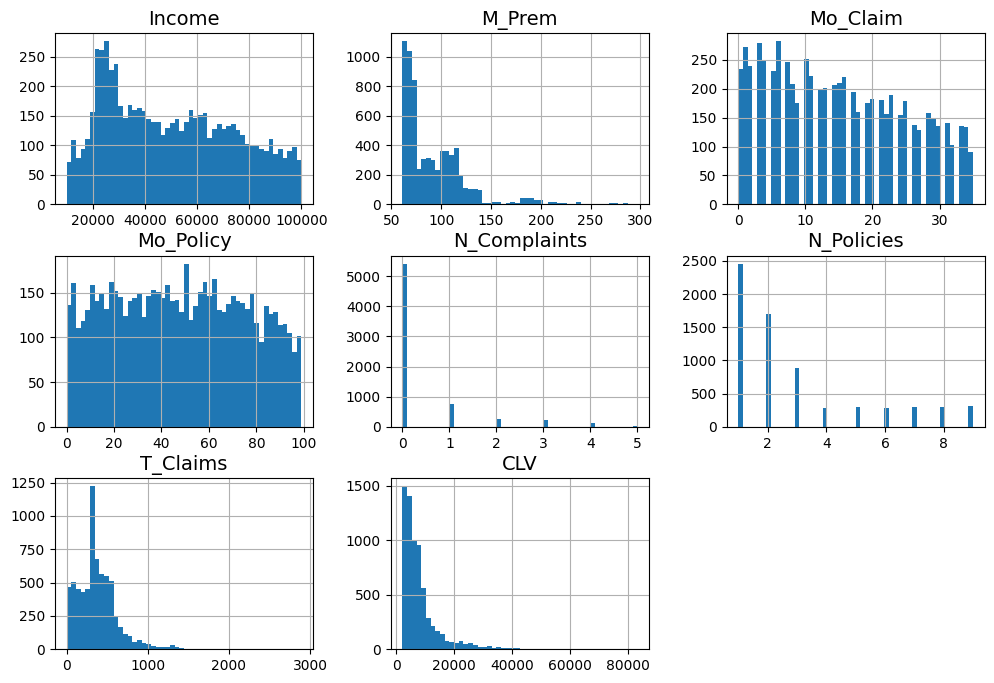

In [6]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

all_data.hist(bins=50, figsize=(12, 8))
plt.show()


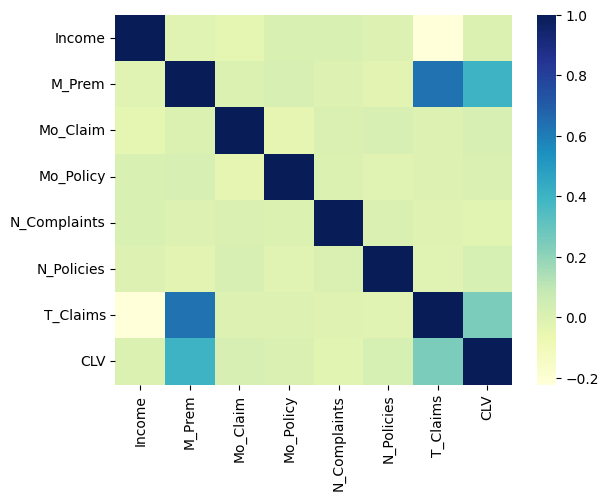

In [7]:
numeric_columns = all_data.select_dtypes(include=[np.number])

sns.heatmap(numeric_columns.corr(), cmap="YlGnBu")
plt.show()



In [8]:
corr_matrix = all_data.corr(numeric_only=True)
corr_matrix["CLV"].sort_values(ascending=False)

CLV             1.000000
M_Prem          0.399491
T_Claims        0.245464
N_Policies      0.022683
Mo_Claim        0.018531
Mo_Policy       0.011275
Income          0.002916
N_Complaints   -0.025038
Name: CLV, dtype: float64

In [9]:
print("Number of unique categories in 'State':", all_data['State'].nunique())
print("Number of unique categories in 'Coverage':", all_data['Coverage'].nunique())
print("Number of unique categories in 'Education':", all_data['Education'].nunique())
print("Number of unique categories in 'Emp_Status':", all_data['Emp_Status'].nunique())
print("Number of unique categories in 'Gender':", all_data['Gender'].nunique())
print("Number of unique categories in 'Loc_Code':", all_data['Loc_Code'].nunique())
print("Number of unique categories in 'M_Status':", all_data['M_Status'].nunique())
print("Number of unique categories in 'P_Type':", all_data['P_Type'].nunique())
print("Number of unique categories in 'S_Channel':", all_data['S_Channel'].nunique())
print("Number of unique categories in 'V_Class':", all_data['V_Class'].nunique())
print("Number of unique categories in 'V_Size':", all_data['V_Size'].nunique())


Number of unique categories in 'State': 5
Number of unique categories in 'Coverage': 3
Number of unique categories in 'Education': 5
Number of unique categories in 'Emp_Status': 4
Number of unique categories in 'Gender': 2
Number of unique categories in 'Loc_Code': 3
Number of unique categories in 'M_Status': 3
Number of unique categories in 'P_Type': 3
Number of unique categories in 'S_Channel': 4
Number of unique categories in 'V_Class': 6
Number of unique categories in 'V_Size': 3


In [10]:
print(all_data['State'].value_counts())
print(all_data['Coverage'].value_counts())
print(all_data['Education'].value_counts())
print(all_data['Emp_Status'].value_counts())
print(all_data['Gender'].value_counts())
print(all_data['Loc_Code'].value_counts())
print(all_data['M_Status'].value_counts())
print(all_data['P_Type'].value_counts())
print(all_data['S_Channel'].value_counts())
print(all_data['V_Class'].value_counts())
print(all_data['V_Size'].value_counts())

State
California    2346
Oregon        1937
Arizona       1273
Nevada         665
Washington     596
Name: count, dtype: int64
Coverage
Basic       4178
Extended    2021
Premium      618
Name: count, dtype: int64
Education
Bachelor                2037
College                 2009
High School or Below    1833
Master                   649
Doctor                   289
Name: count, dtype: int64
Emp_Status
Employed         5698
Medical Leave     432
Disabled          405
Retired           282
Name: count, dtype: int64
Gender
F    3523
M    3294
Name: count, dtype: int64
Loc_Code
Suburban    3657
Rural       1665
Urban       1495
Name: count, dtype: int64
M_Status
Married     4522
Divorced    1163
Single      1132
Name: count, dtype: int64
P_Type
Personal Auto     5068
Corporate Auto    1464
Special Auto       285
Name: count, dtype: int64
S_Channel
Agent          2573
Branch         1924
Call Center    1329
Web             991
Name: count, dtype: int64
V_Class
Four-Door Car    3465
Two-Door

In [11]:

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
train_set, test_set = shuffle_and_split_data(all_data, 0.2)
len(train_set)

5454

In [13]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5454 entries, 3838 to 1270
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         5454 non-null   object 
 1   Coverage      5454 non-null   object 
 2   Education     5454 non-null   object 
 3   Emp_Status    5454 non-null   object 
 4   Gender        5454 non-null   object 
 5   Income        5454 non-null   int64  
 6   Loc_Code      5454 non-null   object 
 7   M_Status      5454 non-null   object 
 8   M_Prem        5454 non-null   int64  
 9   Mo_Claim      5454 non-null   int64  
 10  Mo_Policy     5454 non-null   int64  
 11  N_Complaints  5454 non-null   int64  
 12  N_Policies    5454 non-null   int64  
 13  P_Type        5454 non-null   object 
 14  S_Channel     5454 non-null   object 
 15  T_Claims      5454 non-null   float64
 16  V_Class       5454 non-null   object 
 17  V_Size        5454 non-null   object 
 18  CLV           5454 non-null   

In [14]:
print("Number of unique categories in 'State':", train_set['State'].nunique())
print("Number of unique categories in 'Coverage':", train_set['Coverage'].nunique())
print("Number of unique categories in 'Education':", train_set['Education'].nunique())
print("Number of unique categories in 'Emp_Status':", train_set['Emp_Status'].nunique())
print("Number of unique categories in 'Gender':", train_set['Gender'].nunique())
print("Number of unique categories in 'Loc_Code':", train_set['Loc_Code'].nunique())
print("Number of unique categories in 'M_Status':", train_set['M_Status'].nunique())
print("Number of unique categories in 'P_Type':", train_set['P_Type'].nunique())
print("Number of unique categories in 'S_Channel':", train_set['S_Channel'].nunique())
print("Number of unique categories in 'V_Class':", train_set['V_Class'].nunique())
print("Number of unique categories in 'V_Size':", train_set['V_Size'].nunique())


Number of unique categories in 'State': 5
Number of unique categories in 'Coverage': 3
Number of unique categories in 'Education': 5
Number of unique categories in 'Emp_Status': 4
Number of unique categories in 'Gender': 2
Number of unique categories in 'Loc_Code': 3
Number of unique categories in 'M_Status': 3
Number of unique categories in 'P_Type': 3
Number of unique categories in 'S_Channel': 4
Number of unique categories in 'V_Class': 6
Number of unique categories in 'V_Size': 3


In [15]:
print(train_set['State'].value_counts())
print(train_set['Coverage'].value_counts())
print(train_set['Education'].value_counts())
print(train_set['Emp_Status'].value_counts())
print(train_set['Gender'].value_counts())
print(train_set['Loc_Code'].value_counts())
print(train_set['M_Status'].value_counts())
print(train_set['P_Type'].value_counts())
print(train_set['S_Channel'].value_counts())
print(train_set['V_Class'].value_counts())
print(train_set['V_Size'].value_counts())

State
California    1861
Oregon        1550
Arizona       1020
Nevada         539
Washington     484
Name: count, dtype: int64
Coverage
Basic       3320
Extended    1647
Premium      487
Name: count, dtype: int64
Education
Bachelor                1615
College                 1607
High School or Below    1447
Master                   537
Doctor                   248
Name: count, dtype: int64
Emp_Status
Employed         4576
Medical Leave     336
Disabled          323
Retired           219
Name: count, dtype: int64
Gender
F    2823
M    2631
Name: count, dtype: int64
Loc_Code
Suburban    2912
Rural       1337
Urban       1205
Name: count, dtype: int64
M_Status
Married     3608
Single       924
Divorced     922
Name: count, dtype: int64
P_Type
Personal Auto     4060
Corporate Auto    1158
Special Auto       236
Name: count, dtype: int64
S_Channel
Agent          2066
Branch         1559
Call Center    1048
Web             781
Name: count, dtype: int64
V_Class
Four-Door Car    2764
Two-Door

In [16]:
len(test_set)

1363

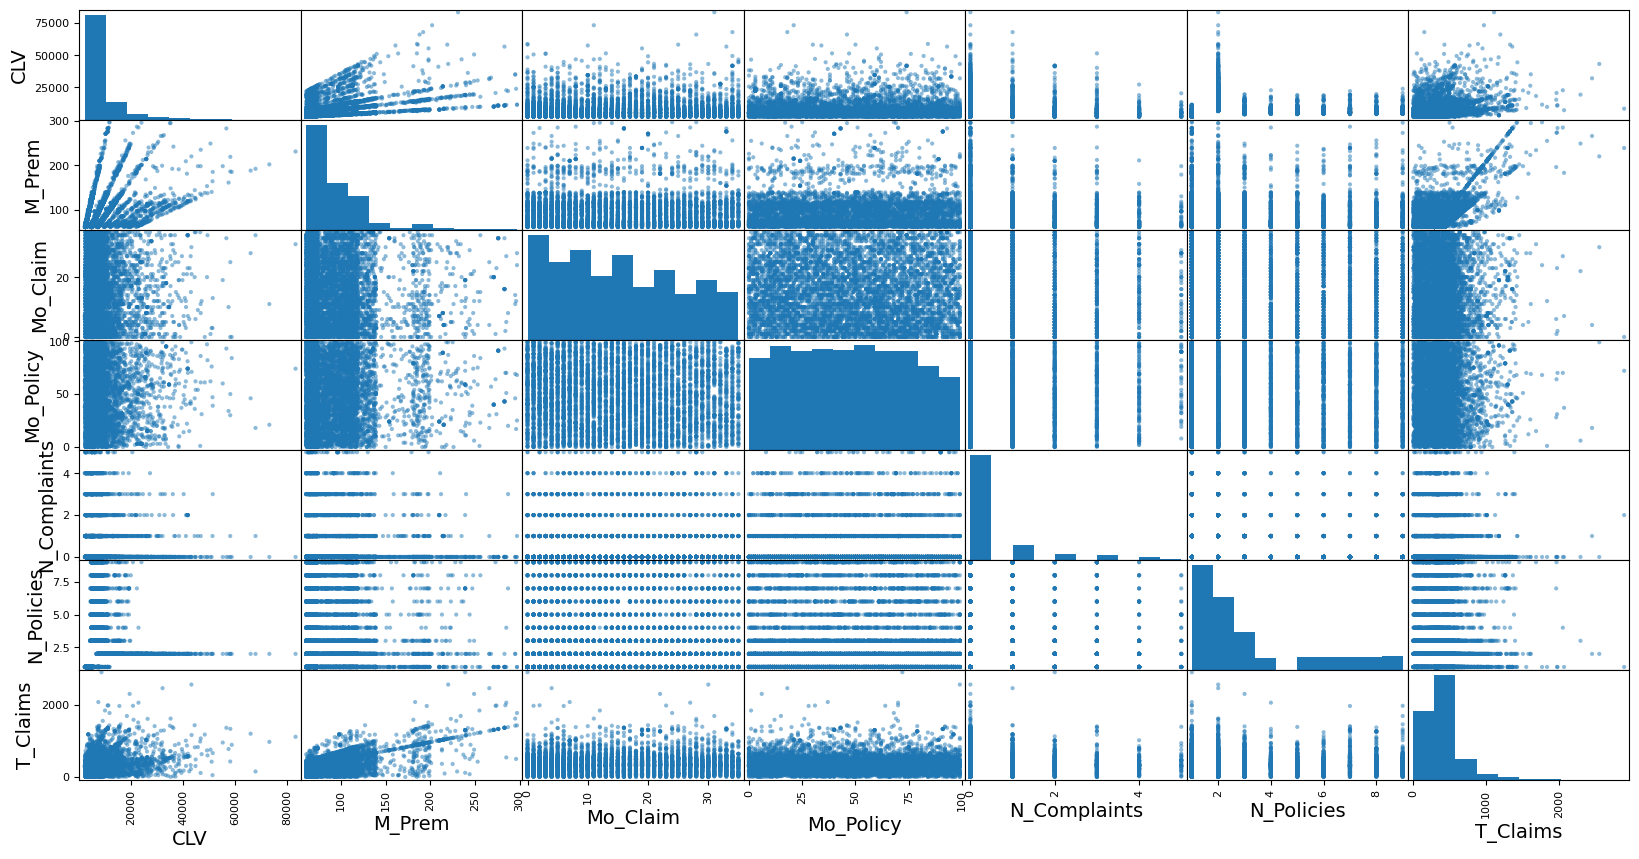

In [23]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# Define the function to save the figure
def save_fig(name):
    plt.savefig(name + ".png", format='png', dpi=300)

# Define the attributes
attributes = ["CLV", "M_Prem", "Mo_Claim", "Mo_Policy",
              "N_Complaints", "N_Policies", "T_Claims"]

# Create the scatter matrix plot with adjusted figsize
scatter_matrix(all_data[attributes], figsize=(20, 10))

save_fig("scatter_matrix_plot") 
plt.show()


In [46]:
clv_training = train_set.drop('CLV', axis=1)
clv_labels = train_set['CLV'].copy()


In [47]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Categorical features
categorical_features = ['State', 'Coverage', 'Education', 'Emp_Status', 'Gender', 
                        'Loc_Code', 'M_Status', 'P_Type', 'S_Channel', 'V_Class', 'V_Size']

category_orders = {
    'State': ['California', 'Oregon', 'Arizona', 'Nevada', 'Washington'],
    'Coverage': ['Basic', 'Extended', 'Premium'],
    'Education': ['High School or Below', 'College', 'Bachelor', 'Master', 'Doctor'],
    'Emp_Status': ['Employed', 'Medical Leave', 'Disabled', 'Retired'],
    'Gender': ['F', 'M'],
    'Loc_Code': ['Suburban', 'Rural', 'Urban'],
    'M_Status': ['Married', 'Divorced', 'Single'],
    'P_Type': ['Personal Auto', 'Corporate Auto', 'Special Auto'],
    'S_Channel': ['Agent', 'Branch', 'Call Center', 'Web'],
    'V_Class': ['Four-Door Car', 'Two-Door Car', 'SUV', 'Sports Car', 'Luxury SUV', 'Luxury Car'],
    'V_Size': ['Medsize', 'Small', 'Large']
}

encoder = OrdinalEncoder()

for feature in categorical_features:
    if feature in category_orders:
        encoder.categories_ = [category_orders[feature]]
    else:
        encoder.categories_ = 'auto'
    clv_training[feature + '_Encoded'] = encoder.fit_transform(clv_training[[feature]])

# Removing the original categorical columns
clv_training.drop(categorical_features, axis=1, inplace=True)

# Convert back to DataFrame
clv_training = pd.DataFrame(clv_training, columns=clv_training.columns)

print(clv_training)


      Income  M_Prem  Mo_Claim  Mo_Policy  N_Complaints  N_Policies  \
6318   53444      72        10         67             1           1   
1629   68568     223         5         28             1           6   
5152   88362      78         9         63             0           1   
310    18577      86        21         76             0           6   
1076   55702      61        13         55             0           6   
...      ...     ...       ...        ...           ...         ...   
2063   29256      63        33         41             0           5   
5245   57938     101         6         36             0           3   
1659   30817      88        25         43             0           1   
4176   16233     197        17         68             0           1   
5517   26239      65        11         39             0           2   

         T_Claims  State_Encoded  Coverage_Encoded  Education_Encoded  \
6318   315.703929            2.0               0.0                0.0   
1

In [48]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
clv_training_scaled = std_scaler.fit_transform(clv_training)

In [49]:
X_test = test_set.drop('CLV', axis=1)
y_test = test_set['CLV']


In [50]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Categorical features
categorical_features = ['State', 'Coverage', 'Education', 'Emp_Status', 'Gender', 
                        'Loc_Code', 'M_Status', 'P_Type', 'S_Channel', 'V_Class', 'V_Size']

category_orders = {
    'State': ['California', 'Oregon', 'Arizona', 'Nevada', 'Washington'],
    'Coverage': ['Basic', 'Extended', 'Premium'],
    'Education': ['High School or Below', 'College', 'Bachelor', 'Master', 'Doctor'],
    'Emp_Status': ['Employed', 'Medical Leave', 'Disabled', 'Retired'],
    'Gender': ['F', 'M'],
    'Loc_Code': ['Suburban', 'Rural', 'Urban'],
    'M_Status': ['Married', 'Divorced', 'Single'],
    'P_Type': ['Personal Auto', 'Corporate Auto', 'Special Auto'],
    'S_Channel': ['Agent', 'Branch', 'Call Center', 'Web'],
    'V_Class': ['Four-Door Car', 'Two-Door Car', 'SUV', 'Sports Car', 'Luxury SUV', 'Luxury Car'],
    'V_Size': ['Medsize', 'Small', 'Large']
}

encoder = OrdinalEncoder()

for feature in categorical_features:
    if feature in category_orders:
        encoder.categories_ = [category_orders[feature]]
    else:
        encoder.categories_ = 'auto'
    X_test[feature + '_Encoded'] = encoder.fit_transform(X_test[[feature]])

# Removing the original categorical columns
X_test.drop(categorical_features, axis=1, inplace=True)

# Convert back to DataFrame
X_test = pd.DataFrame(X_test, columns=X_test.columns)

print(X_test)


      Income  M_Prem  Mo_Claim  Mo_Policy  N_Complaints  N_Policies  \
534    86073     136         3         32             0           1   
3253   72421      65         8         23             0           1   
2199   45949      62         0         70             0           1   
3950   60221      67         3         17             0           2   
4361   47122      62         6         77             0           1   
...      ...     ...       ...        ...           ...         ...   
153    23904     123         1         67             3           1   
2205   71560      69        14         46             0           5   
6151   13792      87         2          3             2           3   
5334   43922      88        26         88             0           2   
2488   81568     186         0         73             0           1   

        T_Claims  State_Encoded  Coverage_Encoded  Education_Encoded  \
534   333.567100            4.0               1.0                3.0   
325

In [51]:
X_test_scaled = std_scaler.transform(X_test)


In [52]:
# Train the linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Creating the model
model = LinearRegression()

# Training the model using the scaled training data
model.fit(clv_training_scaled, clv_labels)

# Making predictions on the scaled testing data
predictions = model.predict(X_test_scaled)

# Evaluating the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

rmse_mean = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Root Mean R-squared:", rmse_mean)


Mean Squared Error: 37952580.40104326
R-squared: 0.1844393149349255
Root Mean R-squared: 6160.566564938915


In [53]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Creating the decision tree regressor model
tree_reg = DecisionTreeRegressor()

# Train the decision tree regressor model using the scaled training data
tree_reg.fit(clv_training_scaled, clv_labels)

# Making predictions on the scaled testing data
predictions_tree = tree_reg.predict(X_test_scaled)

# Evaluating the decision tree regressor model
mse_tree = mean_squared_error(y_test, predictions_tree)
r2_tree = r2_score(y_test, predictions_tree)

rmse_mean = np.sqrt(mse_tree)

print("Decision Tree - Mean Squared Error:", mse_tree)
print("Decision Tree - R-squared:", r2_tree)
print("Decision Tree - Root Mean R-squared:", rmse_mean)


Decision Tree - Mean Squared Error: 27795841.85766691
Decision Tree - R-squared: 0.40269684991494925
Decision Tree - Root Mean R-squared: 5272.1761975171985


In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

# Create an instance of DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()

# Perform cross-validation with 10 folds
mse_scores = cross_val_score(tree_reg, clv_training_scaled, clv_labels, scoring='neg_mean_squared_error', cv=10)
r2_scores = cross_val_score(tree_reg, clv_training_scaled, clv_labels, scoring='r2', cv=10)

# Convert negative MSE scores to positive and calculate the mean
mse_scores = -mse_scores
mean_mse = mse_scores.mean()

# Calculate the mean R-squared score
mean_r2 = r2_scores.mean()

rmse_mean = np.sqrt(mse_mean)

print("Decision Tree - Mean Squared Error (CV=10):", mean_mse)
print("Decision Tree - Mean R-squared (CV=10):", mean_r2)
print("Decision Tree - Root Mean R-squared:", rmse_mean)


Decision Tree - Mean Squared Error (CV=10): 28381380.38188796
Decision Tree - Mean R-squared (CV=10): 0.41707663529653544
Decision Tree - Root Mean R-squared: 3718.4756535235847


In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Creating the Random Forest regressor model
forest_reg = RandomForestRegressor()

# Perform cross-validation with 10 folds
scores = cross_val_score(forest_reg, clv_training_scaled, clv_labels, cv=10, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive values
mse_scores = -scores

# Calculate the mean and standard deviation of the MSE scores
mse_mean = mse_scores.mean()
mse_std = mse_scores.std()

print("Random Forest - Cross-Validation Mean Squared Error:", mse_mean)
print("Random Forest - Cross-Validation Standard Deviation:", mse_std)

# Calculate and print the Root Mean Squared Error (RMSE)
rmse_mean = np.sqrt(mse_mean)
rmse_std = np.sqrt(mse_std)
print("Random Forest - Cross-Validation Root Mean Squared Error:", rmse_mean)
print("Random Forest - Cross-Validation Standard Deviation (RMSE):", rmse_std)


Random Forest - Cross-Validation Mean Squared Error: 15141490.735578487
Random Forest - Cross-Validation Standard Deviation: 2445010.216323929
Random Forest - Cross-Validation Root Mean Squared Error: 3891.206848212838
Random Forest - Cross-Validation Standard Deviation (RMSE): 1563.6528439279382


In [64]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Creating polynomial features
poly = PolynomialFeatures(degree=2)  # Adjust degree as needed
clv_training_poly = poly.fit_transform(clv_training_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Creating the polynomial regression model
poly_reg = LinearRegression()

# Train the polynomial regression model using the scaled training data
poly_reg.fit(clv_training_poly, clv_labels)

# Making predictions on the scaled testing data
predictions_poly = poly_reg.predict(X_test_poly)

# Calculating MSE and RMSE
mse_poly = mean_squared_error(y_test, predictions_poly)
rmse_poly = np.sqrt(mse_poly)  # RMSE is the square root of MSE
r2_poly = r2_score(y_test, predictions_poly)

print("Polynomial Regression - Mean Squared Error:", mse_poly)
print("Polynomial Regression - Root Mean Squared Error:", rmse_poly)
print("Polynomial Regression - R-squared:", r2_poly)


Polynomial Regression - Mean Squared Error: 34526157.587582536
Polynomial Regression - Root Mean Squared Error: 5875.896322058664
Polynomial Regression - R-squared: 0.25806950575567433


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest regressor
forest_reg = RandomForestRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(forest_reg, param_grid, cv=10, scoring='neg_root_mean_squared_error', n_jobs=-1)

# Perform the grid search
grid_search.fit(clv_training_scaled, clv_labels)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

# Get the best estimator
best_forest_reg = grid_search.best_estimator_

# Print the RMSE of the best estimator
print("Best RMSE:", -grid_search.best_score_)


Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Best RMSE: 3812.505225885898


In [75]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Use the best hyperparameters obtained from grid search
best_max_depth = 20
best_min_samples_leaf = 4
best_min_samples_split = 2
best_n_estimators = 300

# Create a new RandomForestRegressor with the best hyperparameters
best_forest_reg = RandomForestRegressor(max_depth=best_max_depth,
                                         min_samples_leaf=best_min_samples_leaf,
                                         min_samples_split=best_min_samples_split,
                                         n_estimators=best_n_estimators)

# Train the model on the scaled training data
best_forest_reg.fit(clv_training_scaled, clv_labels)

# Make predictions on the scaled testing data
predictions = best_forest_reg.predict(X_test_scaled)

# Viewing predicted values side by side with labels for the first 10 samples
results_rf = pd.DataFrame({'Predicted': predictions[:20], 'Actual': y_test[:20]})
print(results_rf)

# Calculate MSE, RMSE, and R-squared for RandomForestRegressor
mse_rf = mean_squared_error(y_test, predictions)
rmse_rf = np.sqrt(mse_rf)  # RMSE is the square root of MSE
r2_rf = r2_score(y_test, predictions)

print("Random Forest - Mean Squared Error:", mse_rf)
print("Random Forest - Root Mean Squared Error:", rmse_rf)
print("Random Forest - R-squared:", r2_rf)



         Predicted  Actual
534    5341.980912    5500
3253   2590.273179    2592
2199   2423.242023    2404
3950   9859.552849   24321
4361   2416.554280    2449
637    2587.133342    2582
2218   2434.864381    2396
1031   5247.350492    5391
1054   3200.969626    3219
912   11962.491946    7174
47     7982.320756    8110
1925   7321.944943    7361
2689   8147.561056    8478
1045  20236.634104   20725
1286   9256.235707    9430
4868   2683.019797    2643
5638   7377.929602    7457
5430   5334.515700    5350
5793   8652.371729    8708
1013   5375.410613    5309
Random Forest - Mean Squared Error: 11779912.023251414
Random Forest - Root Mean Squared Error: 3432.187643945391
Random Forest - R-squared: 0.7468621891273264
